In [53]:
import os
from pprint import pprint as pp
import pandas as pd
import json
import numpy as np
import scipy
import matplotlib.pyplot as plt
import copy
%matplotlib inline
os.getcwd()

'/home/ryan/Documents/insight_projects/steam_prices/data_analysis'

In [2]:
data_path = os.path.abspath('/home/ryan/Documents/insight_projects/steam_prices/data_collection')
steamdb_fol = 'steamdb_jsons'
steamdb_path = os.path.join(data_path,steamdb_fol)
steamdb_fnames = os.listdir(steamdb_path)

In [3]:
list_dict  = {'appid':list(),'fprice':list(),'iprice':list(), 'price_date':list()}
for f in steamdb_fnames:
    appid = int(f.split('.')[0].split('_')[1])
    cur_file = os.path.join(steamdb_path,f)
    with open(cur_file) as json_file:
        json_data = json.load(json_file)
    cur_init = np.array(dict(json_data)[u'data'][ u'initial'])
    cur_final = np.array(dict(json_data)[u'data'][ u'final'])
    if cur_final.size > 0:
        cur_date = cur_init[:,0]
        cur_init_just = cur_init[:,1]
        cur_final_just = cur_final[:,1]
    else:
        cur_date = None
        cur_init_just = None
        cur_final_just = None      
    list_dict['appid'].append(appid)
    list_dict['price_date'].append(cur_date)
    list_dict['iprice'].append(cur_init_just)
    list_dict['fprice'].append(cur_final_just)

In [6]:
df = pd.DataFrame(list_dict)

In [69]:
df.head()

,appid,fprice,iprice,price_date,min_fprice,min_iprice,min_iprice_var,min_iprice_slope,min_iprice_intercept
0,2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,297750,"[39.99, 29.99, 29.99, 19.99, 19.99]","[39.99, 39.99, 39.99, 39.99, 39.99]","[1.417120656e+12, 1.434047268e+12, 1.434994431...","[39.99, 29.99, 29.99, 19.99, 19.99]","[39.99, 39.99, 39.99, 39.99, 39.99]",0.000000e+00,0,39.99
2,19080,"[9.99, 2.49, 2.49]","[9.99, 9.99, 9.99]","[1.417120656e+12, 1.434049315e+12, 1.434996542...","[9.99, 2.49, 2.49]","[9.99, 9.99, 9.99]",0.000000e+00,0,9.99
3,278850,"[4.99, 2.49, 2.49, 2.49, 2.49, 1.49, 1.49]","[4.99, 4.99, 4.99, 4.99, 4.99, 4.99, 4.99]","[1.417120656e+12, 1.417513376e+12, 1.417545207...","[4.99, 2.49, 2.49, 2.49, 2.49, 1.49, 1.49]","[4.99, 4.99, 4.99, 4.99, 4.99, 4.99, 4.99]",7.888609e-31,0,4.99
4,367260,"[5.39, 5.39, 4.01, 4.01, 4.01, 4.01, 4.01, 4.01]","[5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99]","[1.430513702e+12, 1.431104712e+12, 1.43404599e...","[5.39, 5.39, 4.01, 4.01, 4.01, 4.01, 4.01, 4.01]","[5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99]",7.888609e-31,0,5.99


In [33]:
def make_descend(np_array):
    if np_array != None:
        new = np_array
        cur_min = np.infty
        for i,idum in np.ndenumerate(np_array):
            new[i] = np.min([cur_min,np_array[i]])
            cur_min = new[i]
    else:
        new = None
    return new

In [36]:
min_iprice = list()
min_fprice = list()
for item in df.iprice:
    min_iprice_descent = make_descend(item)
    min_iprice.append(min_iprice_descent)

for item in df.fprice:
    min_fprice_descent = make_descend(item)
    min_fprice.append(min_fprice_descent)

In [38]:
df['min_fprice'] = min_fprice
df['min_iprice'] = min_iprice

In [44]:
df = df.fillna(value=np.nan)


In [45]:
df['min_iprice_var'] = df['min_iprice'].apply(np.var)

In [68]:
intercepts = list()
slopes = list()
for x,y in zip(df['price_date'],df['min_iprice']):
    if abs(np.sum(x)) >0: 
        linstat = scipy.stats.linregress(x,y)
    else:
        linstat = (np.nan,np.nan)
    intercepts = np.append(intercepts,linstat[1])
    slopes = np.append(slopes,linstat[0])
    
df['min_iprice_slope'] = slopes
df['min_iprice_intercept'] = intercepts

In [71]:
df['min_iprice_slope'][df['min_iprice_var'] > np.spacing(2)]


16    -1.750405e-10
36    -3.165598e-10
53    -3.138265e-10
54    -2.321009e-10
61    -2.397682e-10
88    -5.443083e-10
92    -3.925511e-09
95    -4.291506e-09
104   -4.191228e-10
105   -4.110342e-09
108   -5.194943e-11
128   -1.299366e-10
152   -4.291427e-09
164   -1.161534e-09
166   -4.529244e-10
...
6081   -5.184942e-10
6088   -2.721694e-10
6097   -1.613740e-10
6102   -3.067520e-10
6103   -2.500268e-10
6127   -9.647339e-10
6135   -7.045586e-10
6142   -7.129163e-11
6144   -1.457928e-10
6145   -2.052250e-11
6178   -1.922564e-10
6180   -8.569364e-10
6184   -1.574378e-10
6186   -3.916915e-10
6190   -5.701188e-10
Name: min_iprice_slope, Length: 621, dtype: float64

In [254]:
'''sort by variance in initial price: no variance, some variance or empty'''

var_dict = {'nv':copy.deepcopy(empty_list_dict), 
            'sv':copy.deepcopy(empty_list_dict), 
            'emp':list()}
for f in steamdb_fnames:
    #assert f.split['.'][1] == '.json'
    appid = int(f.split('.')[0].split('_')[1])
    cur_file = os.path.join(steamdb_path,f)
    with open(cur_file) as json_file:
        json_data = json.load(json_file)
    cur_init = np.array(dict(json_data)[u'data'][ u'initial'])
    cur_final = np.array(dict(json_data)[u'data'][ u'final'])
    if cur_final.size > 0:
        cur_ivar = np.var(cur_init[:,1])
        #desc_init = make_descend(cur_init)
        #desc_fin = make_descend(cur_final)
        if np.ceil(cur_ivar) > 0 and cur_ivar > np.spacing(1): #some variance
            var_dict['sv']['appid'].append(appid)
            var_dict['sv']['fprice'].append(cur_final)
            var_dict['sv']['iprice'].append(cur_init)
            #var_dict['sv']['iprice_min'].append(desc_init)
            #var_dict['sv']['fprice_min'].append(desc_fin)
        else:
            var_dict['nv']['appid'].append(appid)
            var_dict['nv']['fprice'].append(cur_final)
            var_dict['nv']['iprice'].append(cur_init)
            #var_dict['nv']['iprice_min'].append(desc_init)
            #var_dict['nv']['fprice_min'].append(desc_fin)
    else:
        var_dict['emp'].append(appid)
        

    

In [255]:
var_dict['sv']['iprice']

[array([[  1.43051370e+12,   5.99000000e+00],
        [  1.43110471e+12,   5.99000000e+00],
        [  1.43404599e+12,   5.99000000e+00],
        [  1.43499309e+12,   5.99000000e+00],
        [  1.43526871e+12,   6.99000000e+00],
        [  1.43585672e+12,   6.99000000e+00],
        [  1.44112712e+12,   6.99000000e+00],
        [  1.44173193e+12,   6.99000000e+00]]),
 array([[  1.41712066e+12,   1.49900000e+01],
        [  1.41754579e+12,   1.49900000e+01],
        [  1.41892910e+12,   1.49900000e+01],
        [  1.42022403e+12,   1.49900000e+01],
        [  1.42926520e+12,   1.49900000e+01],
        [  1.43337120e+12,   1.99900000e+01],
        [  1.43344110e+12,   1.99900000e+01],
        [  1.43499412e+12,   1.99900000e+01],
        [  1.43862158e+12,   1.99900000e+01],
        [  1.43879431e+12,   1.99900000e+01]]),
 array([[  1.41712066e+12,   5.99900000e+01],
        [  1.41728407e+12,   5.99900000e+01],
        [  1.41728700e+12,   5.99900000e+01],
        [  1.41745712e+12,   5

In [55]:
intercepts = np.array([])
slopes = np.array([])
for i,item in enumerate(var_dict['sv']['iprice']):
    x = item[:,0]
    y = item[:,1]
    ymin = make_descend(y)
    linstat = scipy.stats.linregress(x,y)
    intercepts = np.append(intercepts,linstat[1])
    slopes = np.append(slopes,linstat[0])
    
inter_desc = scipy.stats.describe(intercepts)
slope_desc = scipy.stats.describe(slopes)


NameError: name 'var_dict' is not defined

In [56]:
from scipy import stats

In [123]:
parse_desc(slope_desc)

len: 991.000000 mean:-0.000000 var:0.000000


In [237]:
cur_ivar > np.spacing(1)

False

In [125]:
len(var_dict['sv']['iprice'])

991

358270


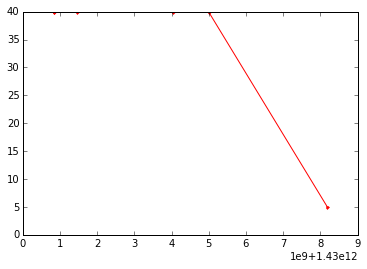

In [238]:
i = 14
print var_dict['sv']['appid'][i]
xi = var_dict['sv']['iprice'][i][:,0]
yi = var_dict['sv']['iprice'][i][:,1]

#xf =var_dict['sv']['fprice'][i][:,0]
#yf =var_dict['sv']['fprice'][i][:,1]
fig, ax = plt.subplots(1,1)

ax.plot(xi,yi,'r.-')
#ax.plot(xf,yf,'b.-')


In [163]:
y

array([ 59.99,  59.99,  59.99,  59.99,  59.99,  59.99,  59.99,  59.99,
        59.99,  59.99,  59.99,  59.99,  59.99,  59.99,  59.99,  59.99,
        59.99,  59.99,  89.99,  59.99,  59.99,  59.99,  59.99,  59.99,
        59.99,  59.99,  59.99,  39.99])

In [189]:
a = {1:2}

In [190]:
import copy

In [191]:
b = copy.deepcopy(a)

In [192]:
a = {2:3}
print b

{1: 2}
